In [1]:
GPA_GRE_PATH = 'gpa-gre.csv'
RUSSIA_PART1_PATH = 'Russia2012/Russia2012_1of2.xls'
RUSSIA_PART2_PATH = 'Russia2012/Russia2012_2of2.xls'

# Part 1

#### 1. What is the difference between SparkContext and SparkSession? 
#### Ans:
   SparkContext is used to connect to the cluster and communicate with it, as well as to execute and coordinate the Spark job with the various resource managers. SparkContext is used to set the configuration parameters for the Spark job. SparkContext was used as a channel to access all Spark functionalities prior to the introduction of Spark2.0.

   SparkSession, on the other hand, was introduced in Spark 2.0 to make developers' jobs easier by removing the need to worry about different contexts and streamlining access to them. If we have access to SparkSession, we also have access to SparkContext. SparkSession is a entry point to use Dataset & DataFrame.
        
        
 Reference: https://towardsdatascience.com/sparksession-vs-sparkcontext-vs-sqlcontext-vs-hivecontext-741d50c9486a

#### 2. What is the difference between a Spark transformation and a Spark action?
#### Ans:
    
  Transformation creates a new RDD from the existing one. For example map and filter function. Transformation is not executed immediately, they are lazily executed.
  
Actions are the operations that are executed on RDD and the result is returned to the driver program. Actions are executed immediately. For example CollectAsList()

        
     

#### 3. Cleaning Data
##### a. What operations do we have on Panda DataFrames to deal with missing values?
   - isnull()
   - isna() 
   
##### b. What are some problems in dealing with missing values in Panda DataFrames?
   - It is difficult to find the accurate replacement of a missing data in case of numerical values.
   - In case of large amount of missing data dropping rows or columns may lead to significant loss of relevant data.
   
##### c. What operations do we have on Spark DataFrames to deal with missing values.
   - isnan() 
   - dropna()
  


#### 4. What is a categorical variable? Give an example.
   Categorical variables represent types of data which may be divided into groups. It does not have a property through which we can order the groups. For example Gender (Male, Female, Non Binary)

#### 5. What are hyperparameters? Give an example.
   Hyperparameters are model parameters that express "higher-level" attributes such as the model's complexity or learning rate.These parameters are usually fixed before the actual training process begins.
   
   For Example:
        Number of clusters in a k-means clustering.

#### 6.  What are two ways to determine a good value for the number of clusters when using K-means?
##### Ans:

###### The Elbow Method: 

For certain values of K repeat the process,

- For all points in the graph, find the squared distance from the centroid of the cluster it belongs to. 
- Take the sum of all squared distances. 

Now we can plot a graph of the calculated sum for different values of K.
The K at which there is a sudden fall in the value of squared distance sum in comparison to the previous K can be chosen as the desired K.



   
    
###### The Silhouette Method: 

Silhouette coefficient for a point is defined as its similarity with the points in the cluster it belongs to and dissimilarity with the points in the cluster it does not belongs to. for certain values of K we can find out the respective Silhouette coefficient and we must choose the K with the highest Silhouette coefficient. 

<b> Silhouette Coeficcient = b(i) - a(i) / Max( a(i), b(i) )</b>

b(i) = average distance between point i and points in the cluster it does not belongs to.
a(i) = average distance between point i and points in the cluster it belongs to.

# Part 2

## Question 2

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [3]:
GPA_GRE = pd.read_csv(GPA_GRE_PATH, index_col=False, header=0)

In [4]:
GPA_GRE['TotalScore'] = GPA_GRE['Verbal'] + GPA_GRE['Quant']
GPA_GRE = GPA_GRE[['TotalScore', 'GPA']].dropna()

In [5]:
X = GPA_GRE.TotalScore.values.reshape(-1,1)
Y = GPA_GRE.GPA.values.reshape(-1,1)
model = LinearRegression(fit_intercept=True)
model.fit(X, Y)

LinearRegression()

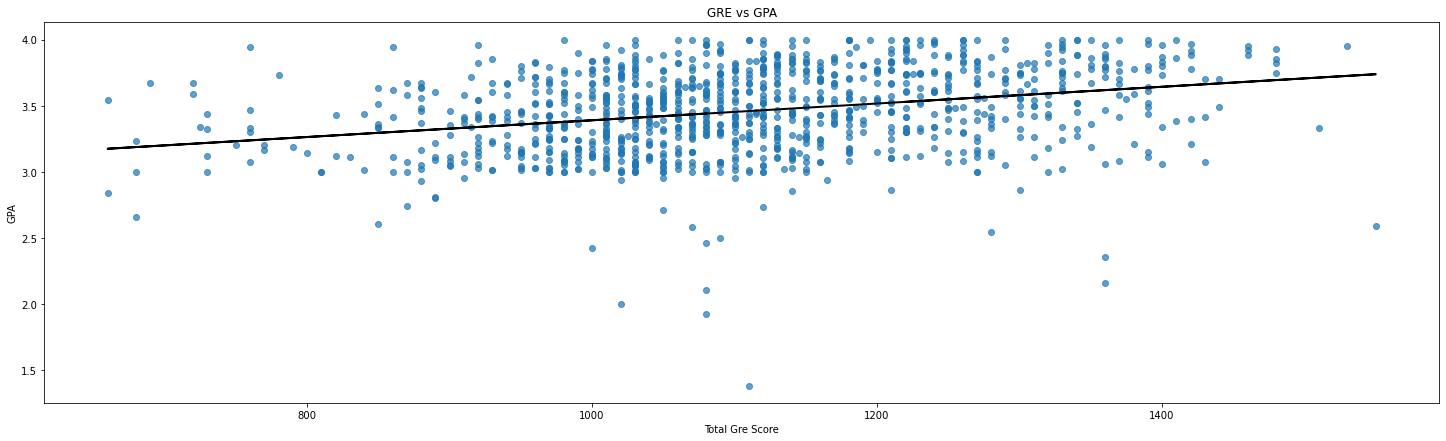

In [6]:
plt.figure(figsize=(25,7))
plt.scatter(X, Y, alpha=0.7);
plt.plot(X, model.predict(X), color="black", linewidth=2)
plt.xlabel('Total Gre Score')
plt.ylabel('GPA')
plt.title('GRE vs GPA')
X = GPA_GRE.TotalScore.values.reshape(-1,1)
Y = GPA_GRE.GPA.values.reshape(-1,1)

In [7]:
print(model.coef_[0])
print(model.intercept_)

[0.00063422]
[2.75464376]


Y = 0.00063422 * X + 2.75464376

In [8]:
Adjusted_R2 = 1-(1 - r2_score(Y, model.predict(X)))*(len(Y) - 1)/(len(Y) - 1 - 1)
Adjusted_R2

0.08520652020468134

###### GRE scores alone are not a good indicator of students' grades in graduate school. However, the prediction will get better by adding more independent variables. 

Text(0.5, 1.0, 'Confusion Matrix')

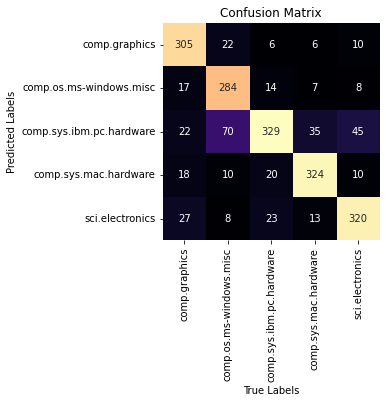

In [9]:
newsGroups = fetch_20newsgroups()
categories = ['comp.os.ms-windows.misc', 'sci.electronics', 'comp.sys.ibm.pc.hardware','comp.sys.mac.hardware', 'comp.graphics']

training = fetch_20newsgroups(subset='train', categories=categories)
testing = fetch_20newsgroups(subset='test', categories=categories)

TfidfModel = make_pipeline(TfidfVectorizer(), MultinomialNB())
countModel = make_pipeline(CountVectorizer(), MultinomialNB())


TfidfModel.fit(training.data, training.target)
prediction = TfidfModel.predict(testing.data)

cfMatrix = confusion_matrix(testing.target, prediction)

sns.heatmap(cfMatrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=training.target_names, yticklabels=training.target_names, cmap="magma")
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('Confusion Matrix')

Text(0.5, 1.0, 'Confusion Matrix')

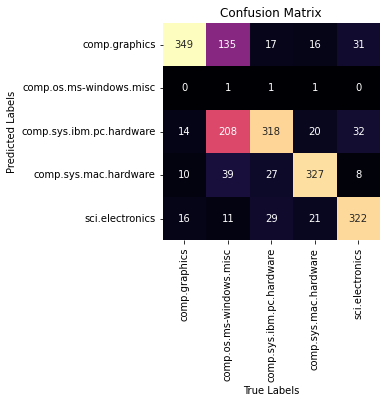

In [10]:
countModel.fit(training.data, training.target)
labels = countModel.predict(testing.data)

Matrix = confusion_matrix(testing.target, labels)
sns.heatmap(Matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=training.target_names, yticklabels=training.target_names, cmap='magma')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('Confusion Matrix')

###### Observation
TfidfVectorizer is better than CountVectorizer as we can clearly see in both the matrices that comp.os.ms-windows.misc prediction is better as it has value of 184 in TfidfVectorizer whereas in case of CountVectorizer there is only 1 value for same category.

## Question 3

In [11]:
Data1 = pd.read_excel(RUSSIA_PART1_PATH)
Data2 = pd.read_excel(RUSSIA_PART2_PATH)
dataFrame = pd.concat([Data1, Data2])

In [12]:
dataFrame.drop(dataFrame.columns[dataFrame.columns.get_loc('Unnamed: 20')], axis=1,inplace=True)
dataFrame.rename(columns = {'Unnamed: 0':'District Name', 
                               'Unnamed: 1':'District Number',
                               'Unnamed: 22':'Zhirinovsky Vladimir Zhirinovsky Percent of votes',
                               'Unnamed: 24':'Gennady Andreyevich Zyuganov Percent of votes',
                               'Unnamed: 26':'Sergei M. Mironov Percent of votes',
                               'Unnamed: 28':'Mikhail Prokhorov Percent of votes',
                               'Unnamed: 30':'Vladimir Putin Percent of votes',}, inplace = True)

array([[<AxesSubplot:title={'center':'Turnout Rate'}>]], dtype=object)

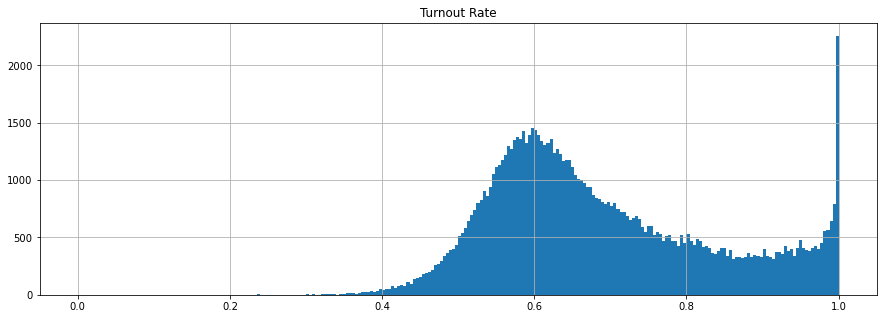

In [13]:
dataFrame['Turnout Rate'] = dataFrame['Number of valid ballots'] / dataFrame['The number of voters included in voters list']
dataFrame.hist(column='Turnout Rate', bins=250, figsize = (15, 5))

In [14]:
dataFrame['Vladimir Putin Percent of votes'] = dataFrame['Vladimir Putin Percent of votes'].replace('c', '0.0%')
dataFrame['Zhirinovsky Vladimir Zhirinovsky Percent of votes'] = dataFrame['Zhirinovsky Vladimir Zhirinovsky Percent of votes'].astype('str').str.split('%').str[0].astype(float)
dataFrame['Gennady Andreyevich Zyuganov Percent of votes'] = dataFrame['Gennady Andreyevich Zyuganov Percent of votes'].astype('str').str.split('%').str[0].astype(float)
dataFrame['Sergei M. Mironov Percent of votes'] = dataFrame['Sergei M. Mironov Percent of votes'].astype('str').str.split('%').str[0].astype(float)
dataFrame['Mikhail Prokhorov Percent of votes'] = dataFrame['Mikhail Prokhorov Percent of votes'].astype('str').str.split('%').str[0].astype(float)
dataFrame['Vladimir Putin Percent of votes'] = dataFrame['Vladimir Putin Percent of votes'].astype('str').str.split('%').str[0].astype(float)


[Text(0.5, 0, 'Percentage of votes'),
 Text(0, 0.5, 'Percentage of Turnout Rate')]

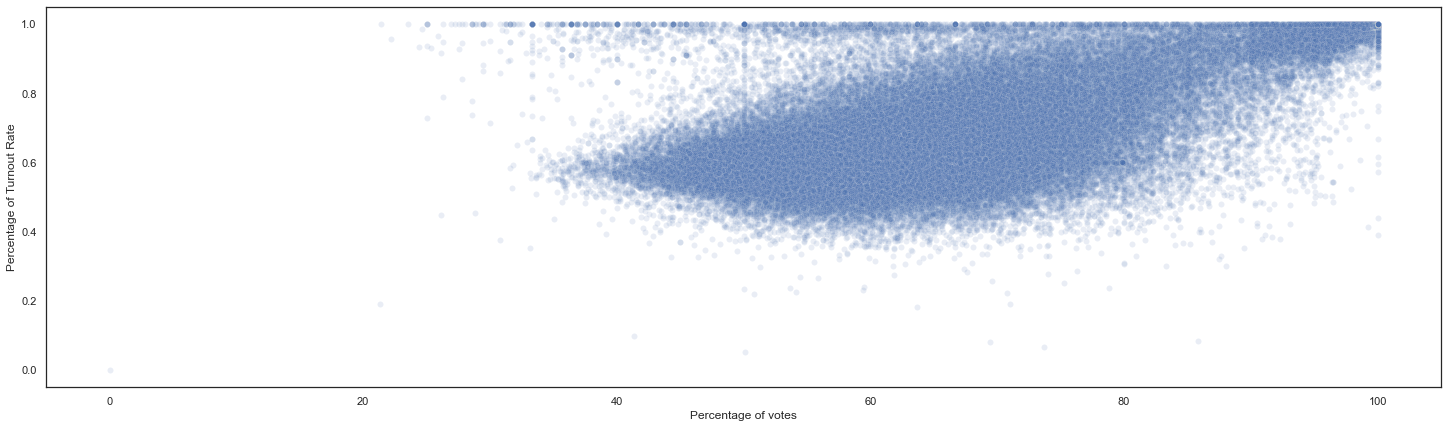

In [15]:
dataFrame['WinnerRate'] = dataFrame[['Zhirinovsky Vladimir Zhirinovsky Percent of votes',
                               'Gennady Andreyevich Zyuganov Percent of votes',
                               'Sergei M. Mironov Percent of votes',
                               'Mikhail Prokhorov Percent of votes',
                               'Vladimir Putin Percent of votes']].max(axis=1)

dataFrame['Turnout Rate']

sns.set(rc = {'figure.figsize':(25,7)})
sns.set_style("white")
winner = sns.scatterplot(x = dataFrame['WinnerRate'], y = dataFrame['Turnout Rate'], alpha = 0.12)
winner.set(xlabel='Percentage of votes', ylabel='Percentage of Turnout Rate')

[Text(0.5, 0, 'Percentage of votes'),
 Text(0, 0.5, 'Percentage of Turnout Rate')]

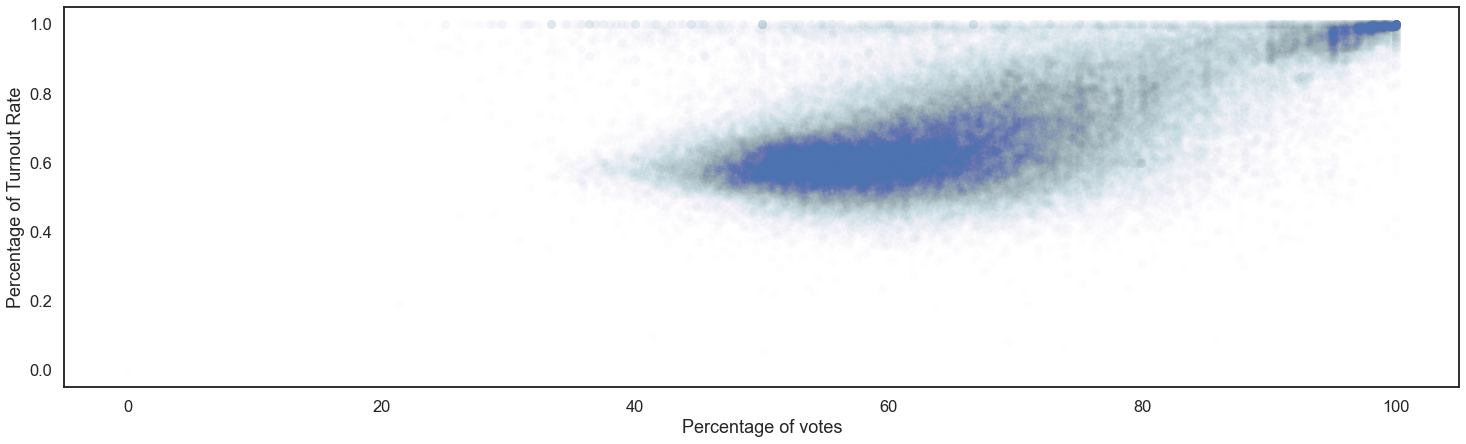

In [16]:
sns.set(rc = {'figure.figsize':(25,7)})
sns.set_style("white")
sns.set_context('talk', font_scale = 1)
winner = sns.scatterplot(x = dataFrame['WinnerRate'], y = dataFrame['Turnout Rate'], alpha = 0.009)
winner.set(xlabel='Percentage of votes', ylabel='Percentage of Turnout Rate')


###### Observation

In the above graph, we can clearly see that 100 percent vote cast to the winner, also the turnout rate is 100 percent. By observing this graph we can detect fraud in elections.